In [1]:
%load_ext autoreload
%autoreload 2
!hostname
!pwd
import os, sys
print(sys.executable)
# os.environ['CUDA_VISIBLE_DEVICES'] = "4"
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
sys.path.append(os.path.abspath(".."))

slurm0-gpu1nodeset-0
/home/akarsh_sakana_ai/nca-alife/src/notebooks
/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/bin/python


In [2]:
import os, sys, glob, pickle
from functools import partial

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from tqdm.auto import tqdm
from einops import rearrange, reduce, repeat

In [3]:
import jax
from jax import numpy as jnp

import util

In [4]:
from create_sim import create_sim, rollout_and_embed_simulation, rollout_simulation, FlattenSimulationParameters
from models.models_boids import Boids
from models.models_boids_mushy import MushyBoids
import imageio

2024-11-08 03:33:09.561528: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version (12.6.68). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


ParameterReshaper: 193 parameters detected for optimization.
(4, 193)


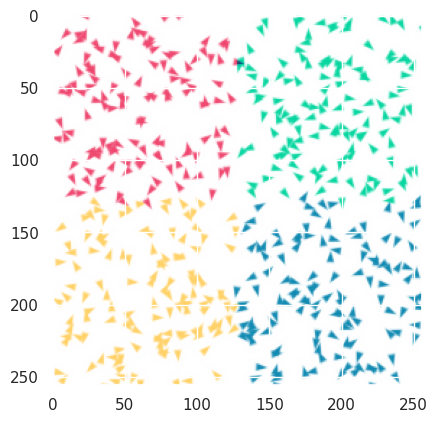

In [7]:
sim = MushyBoids(n_boids=128*4, k_sims=4, space_size=2., init_dist='grid')
rng = jax.random.PRNGKey(0)
params = sim.default_params(rng)
print(params.shape)

state = sim.init_state(rng, params)

img = sim.render_state(state, params, img_size=256)
plt.imshow(img)


In [8]:
rollout_fn = partial(rollout_simulation, sim=sim, rollout_steps=1000, n_rollout_imgs='final', img_size=256)
rollout_fn = jax.jit(rollout_fn)

rollout_data = rollout_fn(rng, params)

# plt.imshow(rollout_data['rgb'][-1])

In [9]:
rollout_data['rgb'].shape

(256, 256, 3)

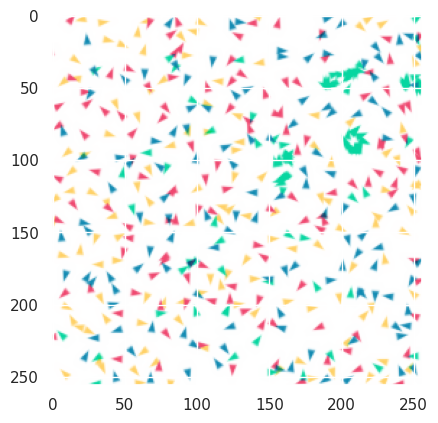

In [10]:
plt.imshow(rollout_data['rgb'])

In [39]:
sim = Boids(n_boids=128, space_size=1.)
sim = FlattenSimulationParameters(sim)
sim = MushyBoids(sim, k_params=4)

rng = jax.random.PRNGKey(1)
params = sim.default_params(rng)

rollout_fn = partial(rollout_simulation, sim=sim, rollout_steps=1000, n_rollout_imgs='final', img_size=512)
rollout_fn = jax.jit(rollout_fn)

rollout_data = rollout_fn(rng, params)

ParameterReshaper: 193 parameters detected for optimization.


In [5]:
pop = util.load_pkl("/home/akarsh_sakana_ai/nca-alife-data/illumination/0_boids/", 'pop')
pop['rgb'].shape

(1024, 224, 224, 3)

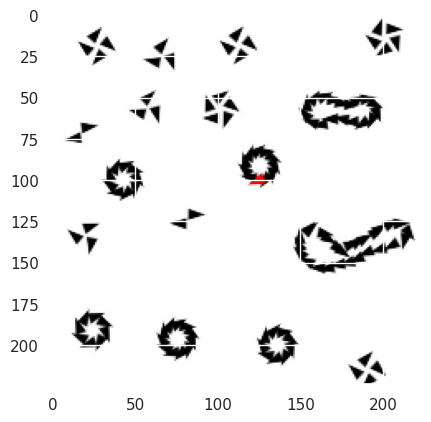

In [41]:
plt.imshow(pop['rgb'][805])

In [42]:
sim = MushyBoids(n_boids=128, k_sims=1, space_size=1., init_dist='random')

rng = jax.random.PRNGKey(0)
params = sim.default_params(rng)
params = pop['params'][805:805+1]

rollout_fn = partial(rollout_simulation, sim=sim, rollout_steps=1000, n_rollout_imgs='final', img_size=512)
rollout_fn = jax.jit(rollout_fn)

rollout_data = rollout_fn(rng, params)

print(rollout_data['rgb'].shape)


ParameterReshaper: 193 parameters detected for optimization.
(512, 512, 3)


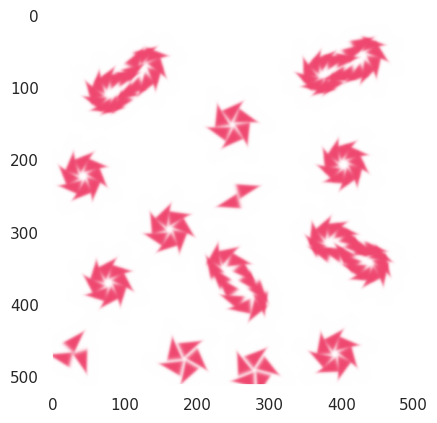

In [43]:
plt.imshow(rollout_data['rgb'])
plt.grid(False)

In [9]:
import imageio

In [11]:
sim = MushyBoids(n_boids=128*4, k_sims=4, space_size=2., init_dist='random')
rng = jax.random.PRNGKey(0)
rollout_fn = partial(rollout_simulation, sim=sim, rollout_steps=1000, n_rollout_imgs='video', img_size=512)
rollout_fn = jax.jit(rollout_fn)

for i in tqdm(range(8)):
    params = pop['params'][800+i:800+i+1]
    rollout_data = rollout_fn(rng, params)
    print(rollout_data['rgb'].shape)
    vid = rollout_data['rgb']
    vid = np.array((vid*255).astype(jnp.uint8))
    imageio.mimwrite(f"/home/akarsh_sakana_ai/nca-alife-data/boids_mush/single_sim_{i}.mp4", vid, fps=15, codec='libx264')

ParameterReshaper: 193 parameters detected for optimization.


  0%|          | 0/8 [00:00<?, ?it/s]

(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


In [12]:
for k in tqdm([1, 2, 4, 8]):
    sim = Boids(n_boids=128*5*5, space_size=5.)
    sim = FlattenSimulationParameters(sim)
    sim = MushyBoids(sim, k_params=k)
    rng = jax.random.PRNGKey(0)
    rollout_fn = partial(rollout_simulation, sim=sim, rollout_steps=1000, n_rollout_imgs='video', img_size=512)
    rollout_fn = jax.jit(rollout_fn)

    params = pop['params'][800:800+k]
    rollout_data = rollout_fn(rng, params)
    print(rollout_data['rgb'].shape)
    vid = rollout_data['rgb']
    vid = np.array((vid*255).astype(jnp.uint8))
    imageio.mimwrite(f"/home/akarsh_sakana_ai/nca-alife-data/boids_mush/mush_with_{k}_params.mp4", vid, fps=15, codec='libx264')

  0%|          | 0/4 [00:00<?, ?it/s]

ParameterReshaper: 193 parameters detected for optimization.
(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


ParameterReshaper: 193 parameters detected for optimization.
(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


ParameterReshaper: 193 parameters detected for optimization.
(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


ParameterReshaper: 193 parameters detected for optimization.
(1000, 512, 512, 3)


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


ImportError: cannot import name 'MushyBoids2' from 'models.models_boids_mushy' (/home/akarsh_sakana_ai/nca-alife/src/models/models_boids_mushy.py)

In [26]:
import imageio

In [6]:

# single sims
params = pop['params'][800:800+9]
sim = MushyBoids(n_boids=128, k_sims=1, space_size=1., init_dist='grid', colors='000000-ffffff')

rng = jax.random.PRNGKey(0)
rollout_fn = partial(rollout_simulation, sim=sim, rollout_steps=1000, n_rollout_imgs='video', img_size=256)
rollout_fn = jax.jit(rollout_fn)

rollout_data = jax.vmap(rollout_fn, in_axes=(None, 0))(rng, params[:, None])
vid = rollout_data['rgb']
vid = jnp.pad(vid, ((0, 0), (0, 0), (2, 2), (2, 2), (0, 0)))
vid = rearrange(vid, "(R C) T H W D -> T (R H) (C W) D", R=3)
vid = np.array((vid*255).astype(jnp.uint8))
imageio.mimwrite(f"/home/akarsh_sakana_ai/nca-alife-data/boids_mush/ak_single_sim.mp4", vid, fps=30, codec='libx264')


2024-11-08 04:27:07.320055: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version (12.6.68). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


ParameterReshaper: 193 parameters detected for optimization.


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (780, 780) to (784, 784) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
[swscaler @ 0x575ef00] Warning: data is not aligned! This can lead to a speed loss


In [10]:
# mushed sims

params = pop['params'][800:800+9]
sim = MushyBoids(n_boids=128*9, k_sims=9, space_size=3., init_dist='grid')

rng = jax.random.PRNGKey(0)
rollout_fn = partial(rollout_simulation, sim=sim, rollout_steps=1000, n_rollout_imgs='video', img_size=256)
rollout_fn = jax.jit(rollout_fn)

rollout_data = rollout_fn(rng, params)
vid = rollout_data['rgb']
vid = jax.image.resize(vid, (1000, 256*3, 256*3, 3), method='bilinear')
vid = np.array((vid*255).astype(jnp.uint8))
imageio.mimwrite(f"/home/akarsh_sakana_ai/nca-alife-data/boids_mush/ak_mushed_sim.mp4", vid, fps=30, codec='libx264')


ParameterReshaper: 193 parameters detected for optimization.


/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


In [20]:
from jax.random import split
def rollout_simulation_with_state(rng, params, sim, rollout_steps, n_rollout_imgs='final', img_size=224,
                       return_state=False, chunk_ends=False, s0=None):
    if s0 is not None:
        state_init = s0
    else:
        state_init = sim.init_state(rng, params)
    if n_rollout_imgs == 'final' or n_rollout_imgs=='image' or n_rollout_imgs == 'img':
        def step_fn(state, _rng):
            next_state = sim.step_state(_rng, state, params)
            return next_state, None
        state_final, _ = jax.lax.scan(step_fn, state_init, split(rng, rollout_steps))
        img = sim.render_state(state_final, params=params, img_size=img_size)
        if return_state:
            return dict(state_init=state_init, state_final=state_final, rgb=img)
        else:
            return dict(rgb=img)
    elif n_rollout_imgs == 'video' or n_rollout_imgs == 'vid':
        def step_fn(state, _rng):
            next_state = sim.step_state(_rng, state, params)
            return next_state, state
        state_final, state_vid = jax.lax.scan(step_fn, state_init, split(rng, rollout_steps))
        vid = jax.vmap(partial(sim.render_state, params=params, img_size=img_size))(state_vid)
        if return_state:
            return dict(state_init=state_init, state_final=state_final, state_vid=state_vid, rgb=vid)
        else:
            return dict(rgb=vid)
    else:
        def step_fn(state, _rng):
            next_state = sim.step_state(_rng, state, params)
            return next_state, state
        state_final, state_vid = jax.lax.scan(step_fn, state_init, split(rng, rollout_steps))
        chunk_size = rollout_steps//n_rollout_imgs
        if chunk_ends:
            idx_sample = jnp.arange(chunk_size-1, rollout_steps, chunk_size)
        else:
            idx_sample = jnp.arange(0, rollout_steps, chunk_size)
        state_vid = jax.tree.map(lambda x: x[idx_sample], state_vid)
        vid = jax.vmap(partial(sim.render_state, params=params, img_size=img_size))(state_vid)

        if return_state:
            return dict(state_init=state_init, state_final=state_final, state_vid=state_vid, rgb=vid)
        else:
            return dict(rgb=vid)

In [51]:
# first half is single sims, second half is mushed sims

# single sims
params = pop['params'][800:800+9]
sim = MushyBoids(n_boids=128, k_sims=1, space_size=1., init_dist='grid', colors='000000-ffffff')

rng = jax.random.PRNGKey(0)
rollout_fn = partial(rollout_simulation, sim=sim, rollout_steps=500, n_rollout_imgs='video', img_size=256, return_state=True)
rollout_fn = jax.jit(rollout_fn)

rollout_data = jax.vmap(rollout_fn, in_axes=(None, 0))(rng, params[:, None])
vid = rollout_data['rgb']
vid = jnp.pad(vid, ((0, 0), (0, 0), (2, 2), (2, 2), (0, 0)))
vid1 = rearrange(vid, "(R C) T H W D -> T (R H) (C W) D", R=3)
print(vid1.shape)

final_state = jax.tree.map(lambda x: rearrange(x[:, -1], "K N ... -> (K N) ..."), rollout_data['state_vid'])
final_state['x'].shape

ParameterReshaper: 193 parameters detected for optimization.
(500, 780, 780, 3)


(1152, 2)

In [52]:

offset = np.arange(9)
offset = repeat(offset, "K -> (K N)", N=128*9//9)
gridlen = int(np.ceil(np.sqrt(9)))
offx, offy = offset%gridlen, offset//gridlen
offset = jnp.stack([offy, offx], axis=-1)
final_state['x'] = final_state['x'] + offset

In [57]:
# mushed sims
params = pop['params'][800:800+9]
sim = MushyBoids(n_boids=128*9, k_sims=9, space_size=3., init_dist='grid')

rng = jax.random.PRNGKey(0)
rollout_fn = partial(rollout_simulation_with_state, sim=sim, rollout_steps=1000, n_rollout_imgs='video', img_size=256, s0=final_state)
rollout_fn = jax.jit(rollout_fn)

rollout_data = rollout_fn(rng, params)
vid = rollout_data['rgb']
vid2 = jax.image.resize(vid, (len(vid), (256+4)*3, (256+4)*3, 3), method='bilinear')
print(vid2.shape)

# vid = np.array((vid*255).astype(jnp.uint8))
# imageio.mimwrite(f"/home/akarsh_sakana_ai/nca-alife-data/boids_mush/ak_mushed_sim.mp4", vid, fps=30, codec='libx264')

ParameterReshaper: 193 parameters detected for optimization.
(1000, 780, 780, 3)


In [58]:
vid = jnp.concatenate([vid1, vid2], axis=0)
vid.shape

(1500, 780, 780, 3)

In [59]:
vid = np.array((vid*255).astype(jnp.uint8))
imageio.mimwrite(f"/home/akarsh_sakana_ai/nca-alife-data/boids_mush/ak_single_to_mushed_sim.mp4", vid, fps=30, codec='libx264')

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (780, 780) to (784, 784) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
/home/akarsh_sakana_ai/miniconda3/envs/nca-alife-jax/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
[swscaler @ 0x7139e80] Warning: data is not aligned! This can lead to a speed loss
